**Abstract/Executive Summary**

The purpose of this project was to construct a foundation recommendation application that would be based solely upon user reviews. This is unique in the sense that most recommendation engines on companys' websites function moreso as a search engine and return products based on amount of clicks, trends, and company sponsorships. However, in creating a recommendation application that is based upon user reviews, it is possible for the user to input their review username or a product they're fond of in order to receive a list of recommended products based on a database of similar user reviews. This recommendation engine is based on a dataset of foundations, reviews, and user characteristics that was scraped from Sephora.com, and methods of analysis include collaborative filtering matrix factorization, singular value decomposition, and KNN.

**Literature Review**

With increased rates of social media usage during the pandemic, the trend cycles seemed to speed up immensely. However, one topic that was thrust in the spotlight and has remained is cosmetics. While society has always been obsessed with the transformation that can be achieved with makeup, this obsession took a new form. Makeup has become a much more heavily researched topic, and nowadays, younger and younger people and more and more people are interested in methods and products they can use to enhance their routines. With that being said, with many more people being newly interested in makeup, it seems as though many people have little to no comprehensive place to look for recommendations by other users. This being said, a recommendation engine that returns products to users based on their user characteristics or a product of interest would be revolutionary for new followers of makeup trends and veteran makeup users looking to switch up their routines. 
Recommendation systems have long been at the forefront of large businesses’ methods of showcasing users new products in hopes of generating revenue. However, few recommendation systems have been created by customers for customers. That being said, in this project, I hope to employ and build upon the techniques of major corporations’ recommender systems and in the process, shape it to the wants, needs, and perspectives of a fellow customer. 
Bearing this in mind, recommendation systems are no new feat. Companies like Facebook, Spotify, and Netflix have the ability to drastically alter user activity with the composition of their recommendation engines. That being said, arguably the most frequently used and widely recognized technique used by recommender systems is collaborative filtering. This process entails computing item similarity, returning similar items, predicting item ratings for users that have not rated the item based on the calculated item similarity and recommendations, generating a sparse user-item rating matrix, filling in the user-item rating matrix with the predicted item ratings, and lastly, recommending results.
Although there are many variations of collaborative filtering, the principle goal is to find out groups or target projects with similar interests to users, which will form a target set upon which the recommendations will be formed. That being said, collaborative filtering is often utilized to analyze reviews, being that it has the ability to generate a recommendation for a user by comparing that user’s profile to similar users based on their documented reviews. 
The first step is to compute item similarity. This can be done a multitude of ways, but the selected method for this project is cosine similarity. In order to compare users and products, an
m x n matrix will be formed that compares m users to n products, and the similarity between products is calculated. In regards to cosine similarity, two items are thought of as two vectors in the m dimensional user-space. The similarity between them is measured by computing the cosine of the angle between these two vectors. With that being said, the goal of recommendation systems is to provide users with products or items they are interested in, but a stepping stone of that process is defining how comparable products are to one another with a quantifiable statistic. 
Next, during collaborative filtering, clusters of similar products are formed using the knn method or a preferred clustering technique. This is done so that later, the sparse matrix of users and items can be transformed to a filled matrix. Additionally, after products have been clustered into similar groups, we then derive the missing item rating based on the known item ratings in the same cluster. This step is what allows the sparse matrix to be filled. 
Expanding on this concept, collaborative filtering algorithms represent the entire m,n user-item data as a ratings matrix, A. Each entry ai;j in A represents the ratings of the ith user on the jth item. Each individual rating is within a numerical scale, and it can also be 0, indicating that the user has not yet rated that item. Nevertheless, if there is a high percentage of missing values, applying matrix factorization in collaborative filtering often results in an overfitting problem. Hence, the matrix factorization is conducted on the filled user-item rating matrix. After rating imputation, the number of missing values is reduced. Then through matrix factorization, the sparsity problem can be further reduced. 
That being said, matrix factorization is a form of embedding that is done to reduce the dimensionality of the square user-item matrix into the product of two lower dimensionality rectangular matrices: By multiplying the user and item vectors, we can get an overall evaluation of user u to item i, which approximates the rating rui, and is denoted by ̂rui. From here, the dimensionality of the recommendations can be reduced to the desired size, and the recommendations may be returned to the user.
	While there are many options that may be utilized to construct a recommendation system, I found in overlooking the present literature that the aforementioned techniques were among the most common, and hence chose them to employ in my project. Even among these techniques presented, there are still branch offs and variations of each that are adapted and proven useful as well.

**Project Plan**

This project will be utilizing data from sephora.com that was found on kaggle.com. Sephora is a multinational retailer of personal care and beauty products. It carries nearly 340 brands and also has its own product line, the Sephora Collection. It was founded in France in 1969 by Dominique Mandonnaud. Sephora launched in the United States in 1999. Sephora’s parent company, LVMH, achieved $82.6 million in revenue in 2022.
 
The premise of this project is to create a foundation recommendation system that is based upon product reviews and returns a handful of recommendations. As mentioned earlier, Sephora.com will be used for generating the recommendation from a database of reviews. Foundation and makeup as a realm contains such a dense amount of information, and because users obviously care greatly about what they’re putting onto a sensitive area of their skin such as their face and are often purchasing relatively expensive products hoping to see substantial results, purchasing a new product can require a decent amount of research. By basing the recommendation system off reviews, users will only be receiving recommendations for products that have positive reviews, and reviews correspond to a user that has similar characteristics of those inputted by the user. What differentiates this application from simply searching for a product on a website and reading the reviews there is the fact that oftentimes search results are based on a variety of statistics that are not reviews. Results are often based on things like amount of clicks, time spent on the product’s site within the website, current identified trends in the market, and current company sponsorships. This recommendation engine will make purchasing a quality product and layering it with other products a consumer has less stressful, less time consuming, and therefore, more attainable. 

Q1: What products have existing users already rated, and based on these ratings, what products can be recommended to the existing user?

H1: Depending on which products have been rated by the existing user, using the implicity-filled user item matrix, products with high predicted ratings will be returned as recommendations. 

Q2: What products should be returned for new users based on an inputted product of interest?

H2: Products that have a high cosine similarity score to the inputted product will be returned as recommendations for new users. 

In [1]:
import numpy as np
import pandas as pd
from collections import Counter
from plotnine import *
import plotnine as p9
import os
import warnings
import random
from pandas.api.types import CategoricalDtype
from scipy.stats import chisquare
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import math
import seaborn as sns
from PIL import Image
from matplotlib import pyplot as plt
from matplotlib.image import BboxImage
from matplotlib.transforms import Bbox, TransformedBbox
import requests
import io
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import plotly as py
from scipy.sparse.linalg import svds
import sklearn
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD
from surprise import SVD, KNNWithMeans, SVDpp, KNNBasic
from surprise import accuracy
from surprise import Reader, Dataset
from surprise.model_selection import train_test_split
from surprise.model_selection import GridSearchCV
from surprise.model_selection import cross_validate
from scipy.sparse.linalg import svds
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
df = pd.read_csv('sephora_reviews.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28403 entries, 0 to 28402
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   brand              28403 non-null  object
 1   name               28403 non-null  object
 2   product_id         28403 non-null  object
 3   coverage           28403 non-null  object
 4   finish             28403 non-null  object
 5   formulation        28403 non-null  object
 6   normal_skin        28403 non-null  bool  
 7   oily_skin          28403 non-null  bool  
 8   combo_skin         28403 non-null  bool  
 9   dry_skin           28403 non-null  bool  
 10  SPF                28403 non-null  bool  
 11  user_name          28403 non-null  object
 12  rating             28403 non-null  int64 
 13  skin_type          28403 non-null  object
 14  skin_tone          28403 non-null  object
 15  skin_concerns      28403 non-null  object
 16  price              28403 non-null  int64

In [4]:
df.head()

,brand,name,product_id,coverage,finish,formulation,normal_skin,oily_skin,combo_skin,dry_skin,SPF,user_name,rating,skin_type,skin_tone,skin_concerns,price,review_text,brand_image_url,product_image_url
0,FENTY BEAUTY by Rihanna,Pro Filt'r Soft Matte Longwear Foundation,P87985432,Medium,Matte,Liquid,True,True,True,True,False,serena2304,4,oily,tan,acne,34,Really good foundation I like it a lot but som...,/contentimages/brands/fentybeauty/logo.jpg,https://www.sephora.com/productimages/sku/s192...
1,FENTY BEAUTY by Rihanna,Pro Filt'r Soft Matte Longwear Foundation,P87985432,Medium,Matte,Liquid,True,True,True,True,False,emilyrerwin,5,combination,porcelain,acne,34,"As someone who is very VERY fair, I have alway...",/contentimages/brands/fentybeauty/logo.jpg,https://www.sephora.com/productimages/sku/s192...
2,FENTY BEAUTY by Rihanna,Pro Filt'r Soft Matte Longwear Foundation,P87985432,Medium,Matte,Liquid,True,True,True,True,False,BrowniexVixen,5,combination,dark,darkCircles,34,First purchase of a foundation of any kind. Wa...,/contentimages/brands/fentybeauty/logo.jpg,https://www.sephora.com/productimages/sku/s192...
3,FENTY BEAUTY by Rihanna,Pro Filt'r Soft Matte Longwear Foundation,P87985432,Medium,Matte,Liquid,True,True,True,True,False,KoKoDior,5,combination,dark,acne,34,I absolutely love this foundation! I get compl...,/contentimages/brands/fentybeauty/logo.jpg,https://www.sephora.com/productimages/sku/s192...
4,FENTY BEAUTY by Rihanna,Pro Filt'r Soft Matte Longwear Foundation,P87985432,Medium,Matte,Liquid,True,True,True,True,False,kristaloveee,5,combination,fair,darkCircles,34,Love this foundation! I was using Too Faced Bo...,/contentimages/brands/fentybeauty/logo.jpg,https://www.sephora.com/productimages/sku/s192...


In [5]:
df.describe()

,rating,price
count,28403.000000,28403.000000
mean,4.628631,38.514699
std,0.622298,7.676778
min,1.000000,20.000000
25%,4.000000,34.000000
50%,5.000000,36.000000
75%,5.000000,44.000000
max,5.000000,87.000000


**Exporatory Data Analysis**

The data used in this analysis starts with 275,950 observations of reviews on 217 different foundations available at Sephora.com across 28 different attributes. The data was obtained from GitHub and was scraped by a user with R in Jupyter Notebook. This data was specifically obtained to be used for a foundation recommendation system based on reviews because Sephora prompts users leaving reviews to specify their own personal characteristics. This makes user-based filtering in the recommendation system much easier as the products recommended can be filtered to only include ones positively rated by users with similar physical features and desires. Relevant attributes of the dataset include: 

brand - brand of the foundation

name - name of the product 

product_id - product ID

coverage - options are Light, Medium, Full

finish - options are Matte, Natural, Radiant

formulation - options are Loose, Cream, Stick, Pressed, Liquid, LiquidStick

normal_skin, oily_skin, combo_skin, dry_skin - logical variables that indicate if a foundation is compatible with the skin type

SPF - logical variable that indicates whether the product contains SPF

user_name - name of the user leaving the review

rating - numerical rating left by the reviewer (on a scale of 1 to 5)

recommended - logical variable indicating whether or not the user recommends the product 

skin_type - skin type of the user correlating to the review (i.e. normal, dry, oily, combination)

skin_tone - skin tone of the user correlating to the review (i.e. light, fair, medium, tan, dark, porcelain, ebony, olive, deep)

skin_concerns - skincare concerns of the user correlating to the review (i.e. acne, darkCircles, aging, sensitivity, blackheads, dullness, unevenSkinTones, redness, sunDamage, pores, puffiness)

price - price of the product 

review_text - the text review left by the user

brand_image_url - image of the brand 

product_image_url - image of the product 

   Unfortunately, this dataset contained multitudes of missing data. Seven columns were removed and not included in the above description due to an overwhelming majority of the data being missing; however, luckily, these columns were not particularly relevant to the task at hand, so utility of the data did not decrease. After this, I was left with 21 attributes. Looking at the remaining data, it can be seen that for 
    
skin_type: 141,587 of the 275,950 rows are missing

eye_color: 98,454 of the 275,950 rows are missing

skin_concerns: 205,085 of 275,950 rows are missing

skin_tone: 93,103 of the 275,950 rows are missing

user_name: 2,940 of the 275,950 rows are missing

recommended: 194,243 of 275,950 rows are missing

finish: 88,852 of 275,950 rows are missing

formulation: 121,653 rows of 275,950 rows are missing

coverage: 87,826 rows of 275,950 rows are missing

Hence, any data with an NA value in any of the attributes was removed. Additionally, any reviews with a recommended value of FALSE, meaning the user does not recommend the product, were removed due to the fact that we would never want the recommendation engine to return a product to a new user that would not be recommended by an existing user. That being said, after making these adjustments, I was left with a dataset of 28,403 observations and 20 variables. Nevertheless, 28,000 observations is still a reasonable amount of data to base a recommendation off of. 
	
   Now to create some visualizations in order to better understand the data at hand. 

Each product has a brand-described finish. In other words, the producer of the foundation tells Sephora what type of finish their product offers, and Sephora displays that on their website. The distribution of this variable is what is displayed below. There are three different types of finishes for foundations: matte, natural, and radiant. Matte is the type of foundation that offers the most oil-control and is generally known for lasting longer than other types of foundations. As we can see from the plot below, matte foundations are the most popular, but natural is a close second. Radiant foundations are the least common. 

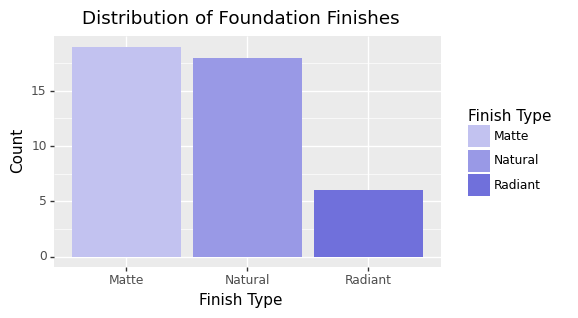

<ggplot: (150503085821)>

In [6]:
finish = [df[df['name'] == i].iloc[0]['finish'] for i in df['name'].unique()]
finish_df = pd.DataFrame({'product': df['name'].unique(), 'finish': finish})
finish_df = finish_df[~finish_df['finish'].isna()]

(p9.ggplot(finish_df, aes('finish')) + 
 geom_bar(aes(fill = 'finish')) +
 ggtitle('Distribution of Foundation Finishes') + 
 xlab('Finish Type') +
 ylab('Count') + 
 theme(figure_size = (5,3)) +
 labs(fill = 'Finish Type') +
 scale_fill_manual(values = ['#c2c2f0', '#9999e6', '#7070db']))

The plot below shows the average rating of different foundation finishes. Finish does not seem to have any effect on average rating, which suggests that customers do not seem to view any type of foundation finish as particularly better or higher-performing compared to other types of foundation finish.

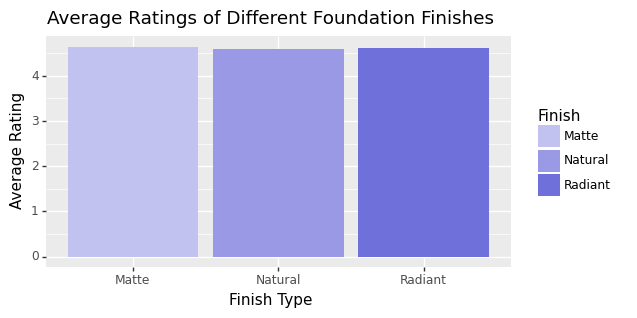

<ggplot: (150503629297)>

In [7]:
warnings.filterwarnings("ignore")
finish_df2 = df.groupby('finish').mean()
finish_df2['Finish'] = finish_df2.index

(p9.ggplot(finish_df2, aes(x = 'Finish', y = 'rating', fill = 'Finish')) + 
 geom_bar(stat = 'identity') +
 ggtitle('Average Ratings of Different Foundation Finishes') + 
 xlab('Finish Type') +
 ylab('Average Rating') + 
 theme(figure_size = (6,3)) +
 scale_fill_manual(values = ['#c2c2f0', '#9999e6', '#7070db']))

The plot below shows the average price of foundations by finish. It does not seem that finish has any effect on average price. However, natural finish foundations have the highest average price out of the three.

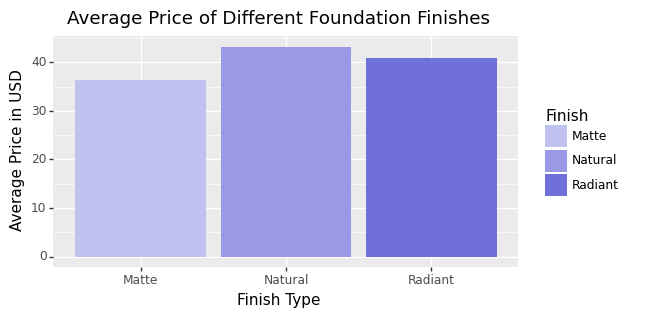

<ggplot: (150503655912)>

In [8]:
warnings.filterwarnings("ignore")
(p9.ggplot(finish_df2, aes(x = 'Finish', y = 'price', fill = 'Finish')) + 
 geom_bar(stat = 'identity') +
 ggtitle('Average Price of Different Foundation Finishes') + 
 xlab('Finish Type') +
 ylab('Average Price in USD') + 
 theme(figure_size = (6,3)) +
 scale_fill_manual(values = ['#c2c2f0', '#9999e6', '#7070db']))

Additionally, it is worth mentioning that there are only 23 unique brands within this dataset and only 43 unique products after cleaning. However, there are 26,504 unique reviewers. Hence, most of the variability in this dataset is coming from the reviewing users, the attributes connected to the user, and the review itself. 

In addition to finish, many brands also give Sephora their foundation coverage information. Foundations can have three different types of coverages: full, light, and medium. Their meanings are fairly intuitive as full means that the coverage is full where as light means that the coverage is light and will not cover up major blemishes. Below, we are going to follow the same steps as we did for foundation finish to see what the distribution of coverage is among foundations sold at Sephora. 

As we can see from the plot below, the majority of foundations have medium coverage though full coverage foundations are quite common as well. Light coverage foundations do not seem to be as popular.

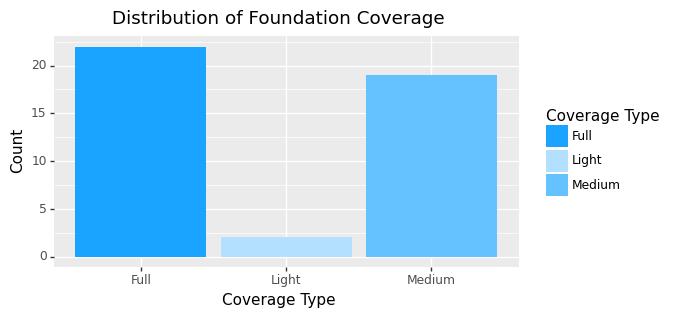

<ggplot: (150503575546)>

In [9]:
warnings.filterwarnings("ignore")
coverage = [df[df['name'] == i].iloc[0]['coverage'] for i in df['name'].unique()]
coverage_df = pd.DataFrame({'product': df['name'].unique(), 'coverage': coverage})
coverage_df = coverage_df[~coverage_df['coverage'].isna()]

(p9.ggplot(coverage_df, aes('coverage')) + 
 geom_bar(aes(fill = 'coverage')) +
 ggtitle('Distribution of Foundation Coverage') + 
 xlab('Coverage Type') +
 ylab('Count') + 
 theme(figure_size = (6,3)) +
 labs(fill = 'Coverage Type') +
 scale_fill_manual(values = ['#1aa3ff','#b3e0ff', '#66c2ff']))

Below are the average ratings of different foundation coverage types. Once again, the average rating does not seem to change much by coverage type. However, medium coverage foundations seem to score a little higher in average reviews than light or medium coverage foundations.

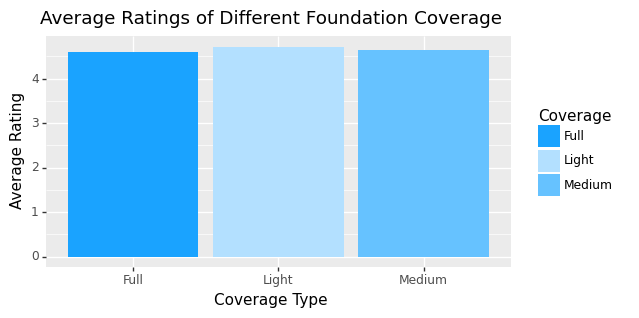

<ggplot: (150493909086)>

In [10]:
warnings.filterwarnings("ignore")
coverage_df2 = df.groupby('coverage').mean()
coverage_df2['Coverage'] = coverage_df2.index

(p9.ggplot(coverage_df2, aes(x = 'Coverage', y = 'rating', fill = 'Coverage')) + 
 geom_bar(stat = 'identity') +
 ggtitle('Average Ratings of Different Foundation Coverage') + 
 xlab('Coverage Type') +
 ylab('Average Rating') + 
 theme(figure_size = (6,3)) +
 scale_fill_manual(values = ['#1aa3ff','#b3e0ff', '#66c2ff']))

Below is the average price of foundations by foundation coverage type. Full coverage foundations tend to be a bit more expensive, and light foundations are the cheapest. 

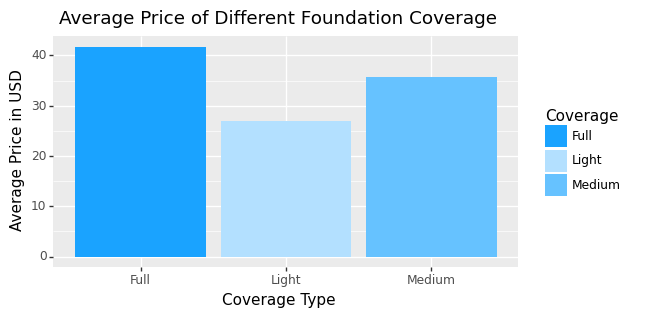

<ggplot: (150503744693)>

In [11]:
warnings.filterwarnings("ignore")
(p9.ggplot(coverage_df2, aes(x = 'Coverage', y = 'price', fill = 'Coverage')) + 
 geom_bar(stat = 'identity') +
 ggtitle('Average Price of Different Foundation Coverage') + 
 xlab('Coverage Type') +
 ylab('Average Price in USD') + 
 theme(figure_size = (6,3)) +
 scale_fill_manual(values = ['#1aa3ff','#b3e0ff', '#66c2ff']))

The final thing that is necessary to visualize before diving a little deeper into the analysis is the distribution of foundation formulation types. Foundation formulation can come in five different options: cream, liquid, loose, pressed, and stick. From the plot below, we can see that liquid foundations are the most common type of foundation. Generally, women use more than one type of foundation. There is the base, which is usually liquid, cream, or stick foundation. And then, to top it off and set the foundation, a pressed or loose powder foundation is applied as well. Looking at the plot below, most of the foundations are liquid. 

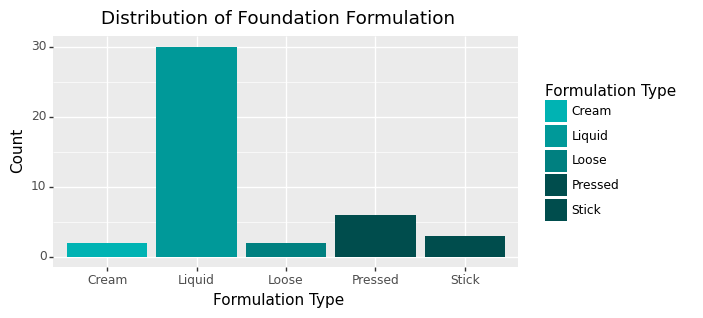

<ggplot: (150503713633)>

In [12]:
# change value for one foundation because Liquid Stick does not exist as a formulation, it is a liquid foundation
df.at[26359, 'formulation'] = 'Liquid'

warnings.filterwarnings("ignore")
formulation = [df[df['name'] == i].iloc[0]['formulation'] for i in df['name'].unique()]
formulation_df = pd.DataFrame({'product_id': df['name'].unique(), 'formulation': formulation})
formulation_df = formulation_df[~formulation_df['formulation'].isna()]

(p9.ggplot(formulation_df, aes('formulation')) + 
 geom_bar(aes(fill = 'formulation')) +
 ggtitle('Distribution of Foundation Formulation') + 
 xlab('Formulation Type') +
 ylab('Count') + 
 theme(figure_size = (6,3)) +
 labs(fill = 'Formulation Type') +
 scale_fill_manual(values = ['#00b3b3','#009999','#008080', '#004d4d','#004d4d']))

Once again, looking at the average ratings by formulation type, there really is no difference between formulation type of products and their average reviews.

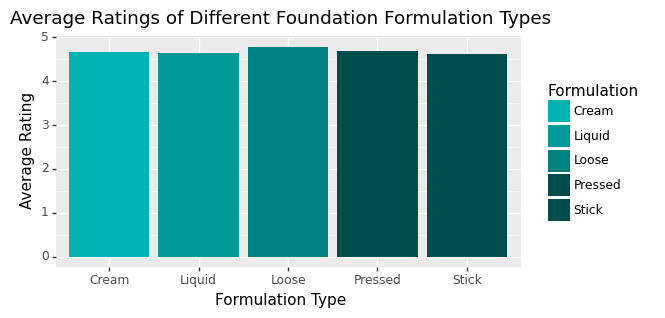

<ggplot: (150503082572)>

In [13]:
warnings.filterwarnings("ignore")
formulation_df2 = df.groupby('formulation').mean()
formulation_df2['Formulation'] = formulation_df2.index
formulation_df2 = formulation_df2[formulation_df2['Formulation'] != 'LiquidStick']

(p9.ggplot(formulation_df2, aes(x = 'Formulation', y = 'rating', fill = 'Formulation')) + 
 geom_bar(stat = 'identity') +
 ggtitle('Average Ratings of Different Foundation Formulation Types') + 
 xlab('Formulation Type') +
 ylab('Average Rating') + 
 theme(figure_size = (6,3)) +
 scale_fill_manual(values = ['#00b3b3','#009999','#008080', '#004d4d','#004d4d']))

While the average review of different foundation types seemed to stay the same across all foundation types, the same cannot be said of average price. These bounced around a bit more with the lowest average price of foundation being for pressed powder foundations and the highest being for stick foundations. 

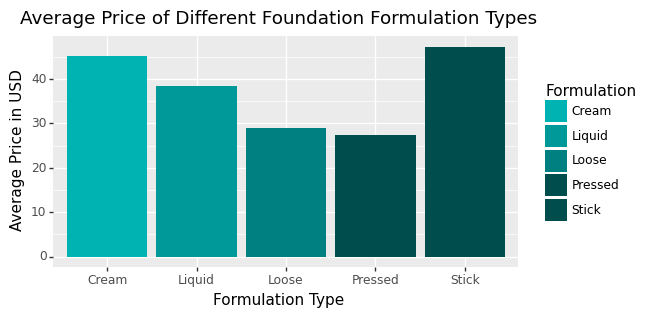

<ggplot: (150503630388)>

In [14]:
warnings.filterwarnings("ignore")
(p9.ggplot(formulation_df2, aes(x = 'Formulation', y = 'price', fill = 'Formulation')) + 
 geom_bar(stat = 'identity') +
 ggtitle('Average Price of Different Foundation Formulation Types') + 
 xlab('Formulation Type') +
 ylab('Average Price in USD') + 
 theme(figure_size = (6,3)) +
 scale_fill_manual(values = ['#00b3b3','#009999','#008080', '#004d4d','#004d4d']))

After looking at some overall product distributions, it was necessary to explore what was going on with the brands in our data, so we did some analysis on the differences between brands. Brand was the most appropriate way of grouping our products. The reason is for this is because each brand has their own standards for formulation of product, and customer bases tend to stick to a brand. 

Referencing the visualization below, the most popular brand by reviews is Fenty Beauty by Rihanna, and it is not particularly close. The next closest brands are Too Faces and Kat Von D.

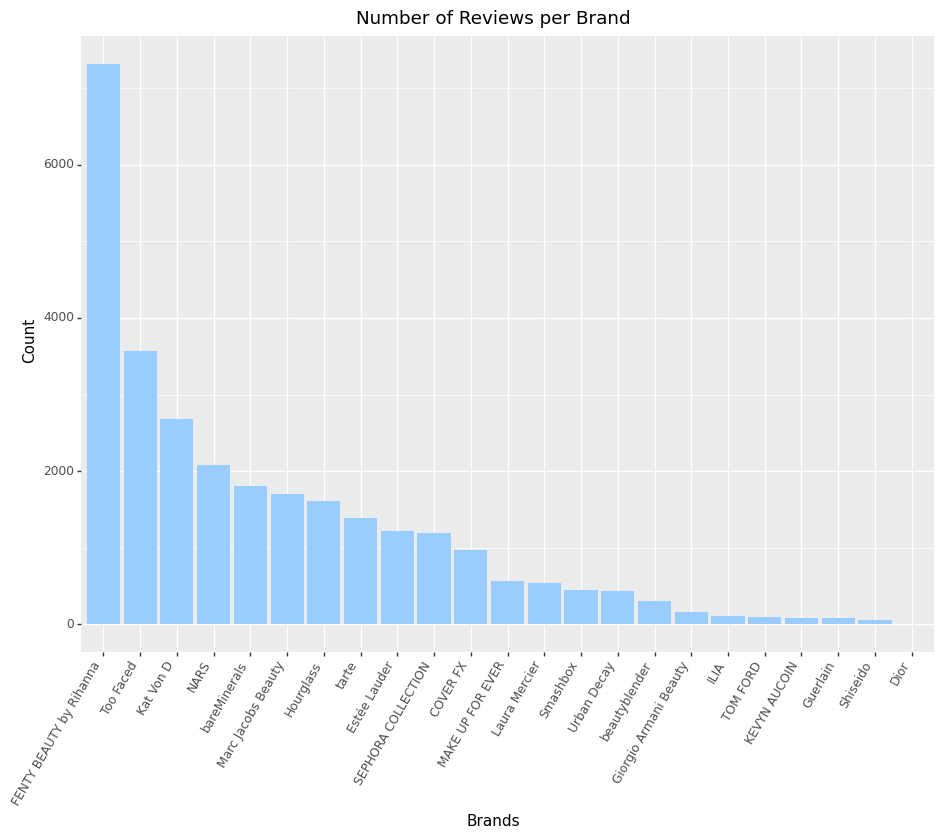

<ggplot: (150503067691)>

In [15]:
# reorder data frame by value counts per brand
brand_list = df['brand'].value_counts().index.tolist()
brand_cat = CategoricalDtype(categories=brand_list, ordered = True)
df['brand_cat'] = df['brand'].astype(str).astype(brand_cat)

warnings.filterwarnings("ignore")
(p9.ggplot(df, aes('brand_cat')) +
geom_bar(fill="#99ccff") +
theme(figure_size = (11,8)) +
theme(axis_text_x=element_text(rotation=60, hjust=1)) +
ggtitle('Number of Reviews per Brand') + 
xlab('Brands') + 
ylab('Count'))

The cell below is being used to create a new data frame with aggregated information about each brand, particuarly the average review and review count for each.

In [16]:
# create new brand_df data frame with aggregated info about brands
brands = list(df['brand'].unique())
avg_reviews = [round(df[df['brand'] == i]['rating'].mean(),2) for i in brands]
count = df['brand'].value_counts()
brand_df = pd.DataFrame({'brand':brands, 'AverageReview':avg_reviews, 'Count': count}).reset_index(drop=True)
brand_df

,brand,AverageReview,Count
0,FENTY BEAUTY by Rihanna,4.67,7311
1,Giorgio Armani Beauty,4.64,3569
2,Estée Lauder,4.78,2677
3,Too Faced,4.64,2085
4,bareMinerals,4.65,1802
5,Kat Von D,4.55,1704
6,tarte,4.60,1606
7,Urban Decay,4.66,1393
8,Hourglass,4.60,1219
9,SEPHORA COLLECTION,4.65,1190


The following cell is used to create a function that will return the 95% confidence interval for the average rating of each brand and to then visualize the 95% confidence interval of average review per brand. 

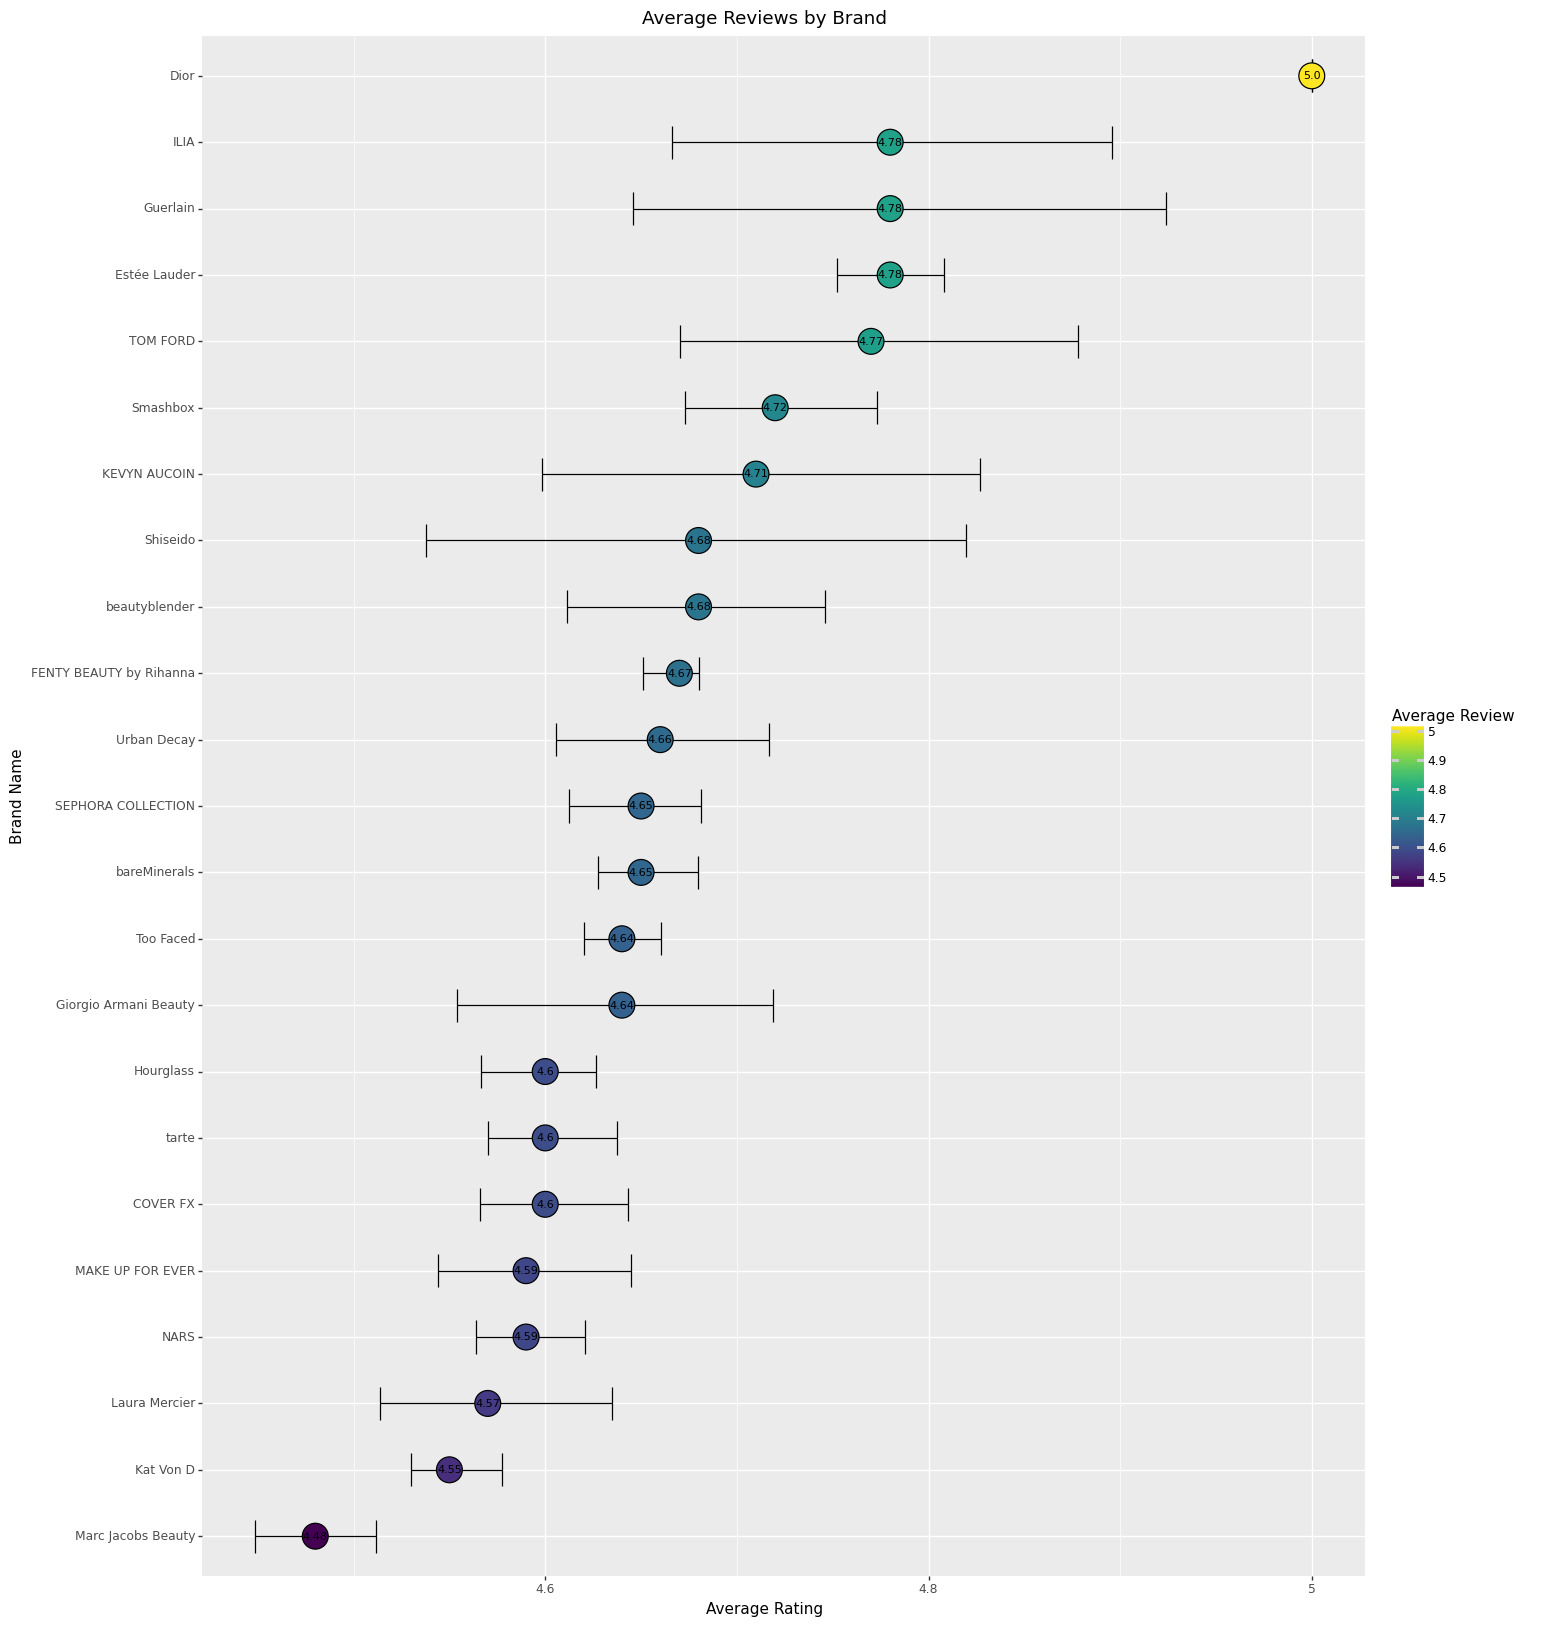

<ggplot: (150503710160)>

In [17]:
# function to find 95% CI for ratings
def ninety_five_CI(brand):
    """
    input: brand
    output: lower and upper confidence limits for brand in data frame
    """
    
    dat = df[df['brand'] == brand]
    sdv = np.std(dat['rating'])
    lower = np.mean(dat['rating']) - (1.96*(sdv/math.sqrt(len(dat))))
    upper = np.mean(dat['rating']) + (1.96*(sdv/math.sqrt(len(dat))))
    return(lower, upper)

# add upper and lower limits of CI to brand_df
brand_df['lower_rating_lim'] = [ninety_five_CI(i)[0] for i in brand_df['brand']]    
brand_df['upper_rating_lim'] = [ninety_five_CI(i)[1] for i in brand_df['brand']]

# reorder brand_df to go in descending order based on 'AverageReview'
brand_order1 = brand_df.sort_values('AverageReview').reset_index(drop=True)['brand']
brand_df['brand'] = pd.Categorical(brand_df['brand'], categories=brand_order1, ordered=True)

warnings.filterwarnings("ignore")
(p9.ggplot(brand_df, aes(x='brand',y='AverageReview', label = 'AverageReview', fill = 'AverageReview')) + 
geom_errorbar(aes(ymin='lower_rating_lim', ymax='upper_rating_lim'), color="black") +
geom_point(stat='identity', size = 10) +
geom_text(color = 'black', size = 8) +
theme(figure_size = (15,20)) +
coord_flip() +
ggtitle('Average Reviews by Brand') +
ylab('Average Rating') +
xlab('Brand Name') +
labs(fill = 'Average Review'))

The average review for foundation by brand is shown above. As can be seen, the lowest average reviews rest around 4.48 while the highest go to 5.0. The black bars around the points represent the 95-percent confidence intervals for the average reviews. I felt that it was insufficient to only include the average reviews because that does not account for the number of people reviewing the product. For example, let's say we have two products: Product A and Product B. Product A has an average rating of 5 stars out of 5 stars but only has 1 review. Product B has an average rating of 4.8 stars with over 50 reviews. It would make sense to trust Product B since it has far more reviews. This is the reason I included the confidence intervals. The wider the confidence interval, the less reviews the product has, which is why the interval is larger, and thus, the average review is less trustworthy.

Many of the most expensive / "luxury" brands have the highest ratings. The highest rated foundations come from Dior, Guerlain, Estée Lauder, and Tom Ford. Brands that tend to gear themselves more towards a younger generation such as Make Up For Ever, Kat Von D, and CoverFX tend to not do as well in average ratings. These brands that go for a younger crowd also tend to be a bit cheaper, though at Sephora, it is rare to find any makeup that can rival drug store makeup prices.

The question that may be worth exploring in the future is if ratings for luxury brands are inflated due to the customer wanting to like an expensive product. It is possible that consumers are less willing to criticize the foundation because of the hefty price paid. In addition, packaging and luxuriousness of the packaging may play a major role. This could also be an incentive for less criticism of the product.

In the plot above, I showed the average rating of each brand with a 95 percent confidence band. The confidence band shows how much we should trust the average rating because the smaller the confidence band, the more reviewers that reviewed products from that brand. Now, we want to be able to adjust the average rating to adjust for the total number of people who reviewed the products from the brand. In order to do this, we are going to attempt to use a Bayesian model with our multicategory rating data. Because our categorical data is ordinal, we are going to take the sum of the marginal posterior distributions multiplied by the weight of each rating category to get our final Bayesian adjusted score. The goal is that the Bayesian adjusted score will push down the score of brands with fewer reviews. 

In order to keep our prior fairly non-informative (because we don't our Bayesian estimate to weigh the prior too much), the prior is going to be the fraction of reviews that are 1 star, 2 star, etc. for the entire dataset multiplied by 20.

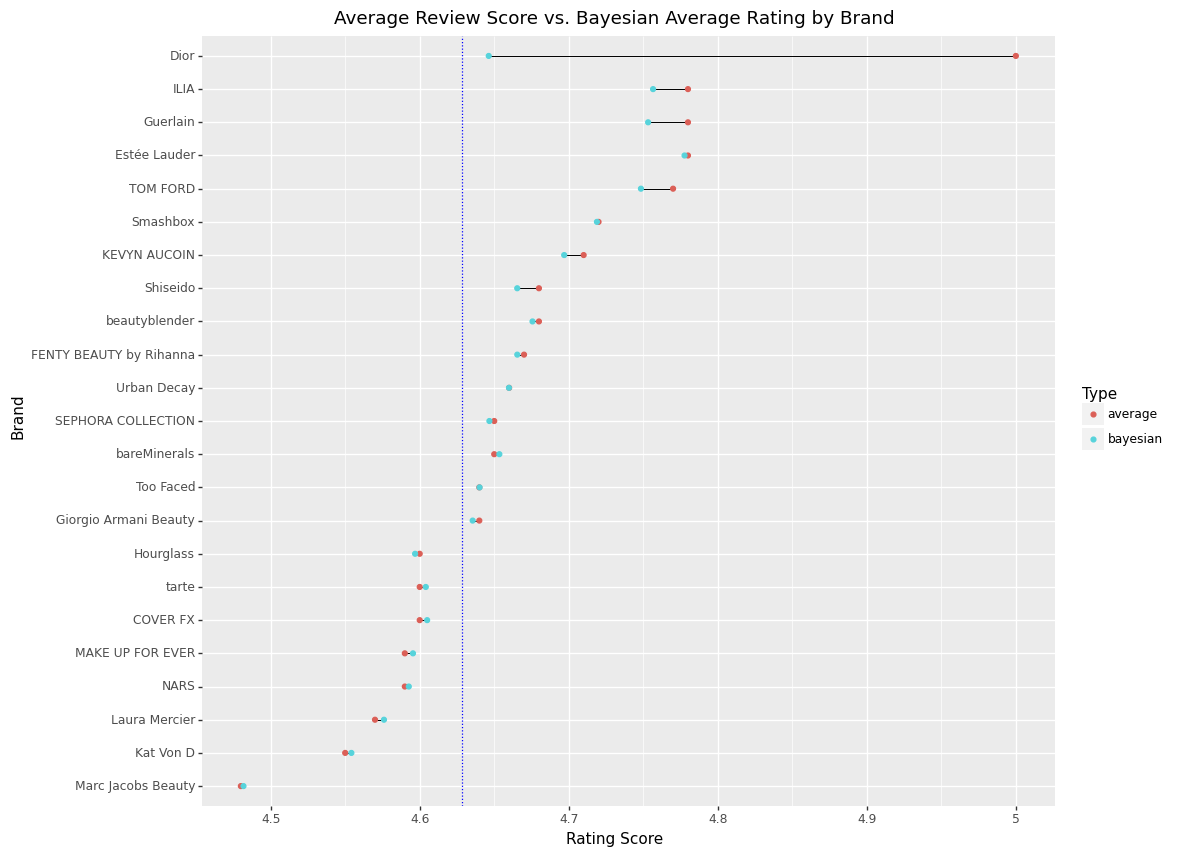

<ggplot: (150504087188)>

In [18]:
df['rating'] = df['rating'].astype(int)
alpha_list = [(20*(len(df[df['rating'] == 1])/len(df))),
              (20*(len(df[df['rating'] == 2])/len(df))),
              (20*(len(df[df['rating'] == 3])/len(df))),
              (20*(len(df[df['rating'] == 4])/len(df))),
              (20*(len(df[df['rating'] == 5])/len(df)))]

def bayesian_adj(alphas, brand):
    
    """return bayesian adjusted average for brand"""
    dat = df[df['brand'] == brand]

    exp_one = ((alphas[0] + len(dat[dat['rating'] == 1])))/(20+len(dat))
    exp_two = (2*((alphas[1] + len(dat[dat['rating'] == 2])))/(20+len(dat)))
    exp_three = (3*((alphas[2] + len(dat[dat['rating'] == 3])))/(20+len(dat)))
    exp_four = (4*((alphas[3] + len(dat[dat['rating'] == 4])))/(20+len(dat)))
    exp_five = (5*((alphas[4] + len(dat[dat['rating'] == 5])))/(20+len(dat)))
    
    return exp_one + exp_two + exp_three + exp_four + exp_five

brand_df['bayesian'] = [bayesian_adj(alpha_list, i) for i in brand_df['brand']]

# creating new data frame for plot legend
ratings_df_1 = brand_df[['brand', 'AverageReview']]
ratings_df_2 = brand_df[['brand', 'bayesian']]

ratings_df_1['type'] = 'average'
ratings_df_2['type'] = 'bayesian'

ratings_df_1 = ratings_df_1.rename(index=str, columns={'AverageReview': 'Score'})
ratings_df_2 = ratings_df_2.rename(index=str, columns={'bayesian': 'Score'})

ratings_df_list = [ratings_df_1,ratings_df_2]
ratings_df = pd.concat(ratings_df_list)

warnings.filterwarnings("ignore")
(p9.ggplot() + 
 geom_segment(brand_df, 
              aes(x = 'AverageReview', xend = 'bayesian', y = 'brand', yend = 'brand'),
              size = 0.4) +
 geom_point(ratings_df, aes(x='Score', y = 'brand', color = 'type')) +
 geom_vline(xintercept = df['rating'].mean(), color = 'blue', linetype = 'dotted') +
 theme(figure_size = (11,10)) + 
 ggtitle('Average Review Score vs. Bayesian Average Rating by Brand') +
 xlab('Rating Score') + 
 ylab('Brand') +
 labs(color = 'Type') +
 scale_color_discrete(values = ['Average Rating', 'Bayesian Average']))

Above, we can see how the average moves when we take the Bayesian average. It does exactly what we would expect. With brands that have a smaller number of reviews (larger confidence intervals from the plot before), the prior drags the average towards the global average rating (which is our prior). However, brands that have many reviews do not see much movement at all towards the global average of 4.63 stars. The further away the Bayesian average is from the initial average, the more wary we should be of the average review for the brand. Something to keep in mind is that the new Bayesian average is completely dependent on the prior I picked. I chose the global average of all foundation ratings as my average. Let's say, however, that I decided I wanted to use 3 as my prior such that the rating 3 had the highest weight out of the five ratings. Then, you would see all the ratings move closer to 3, some more than others (based on the number of people who reviewed their product).

Something else worth looking into was the relationship between price and brand. Naturally, the more luxurious brands like Tom Ford and Giorgio Armani Beauty have average prices over 50 dollars per foundation. The Sephora Collection, on the other hand, has the lowest average cost that is under 25 dollars per foundation. 

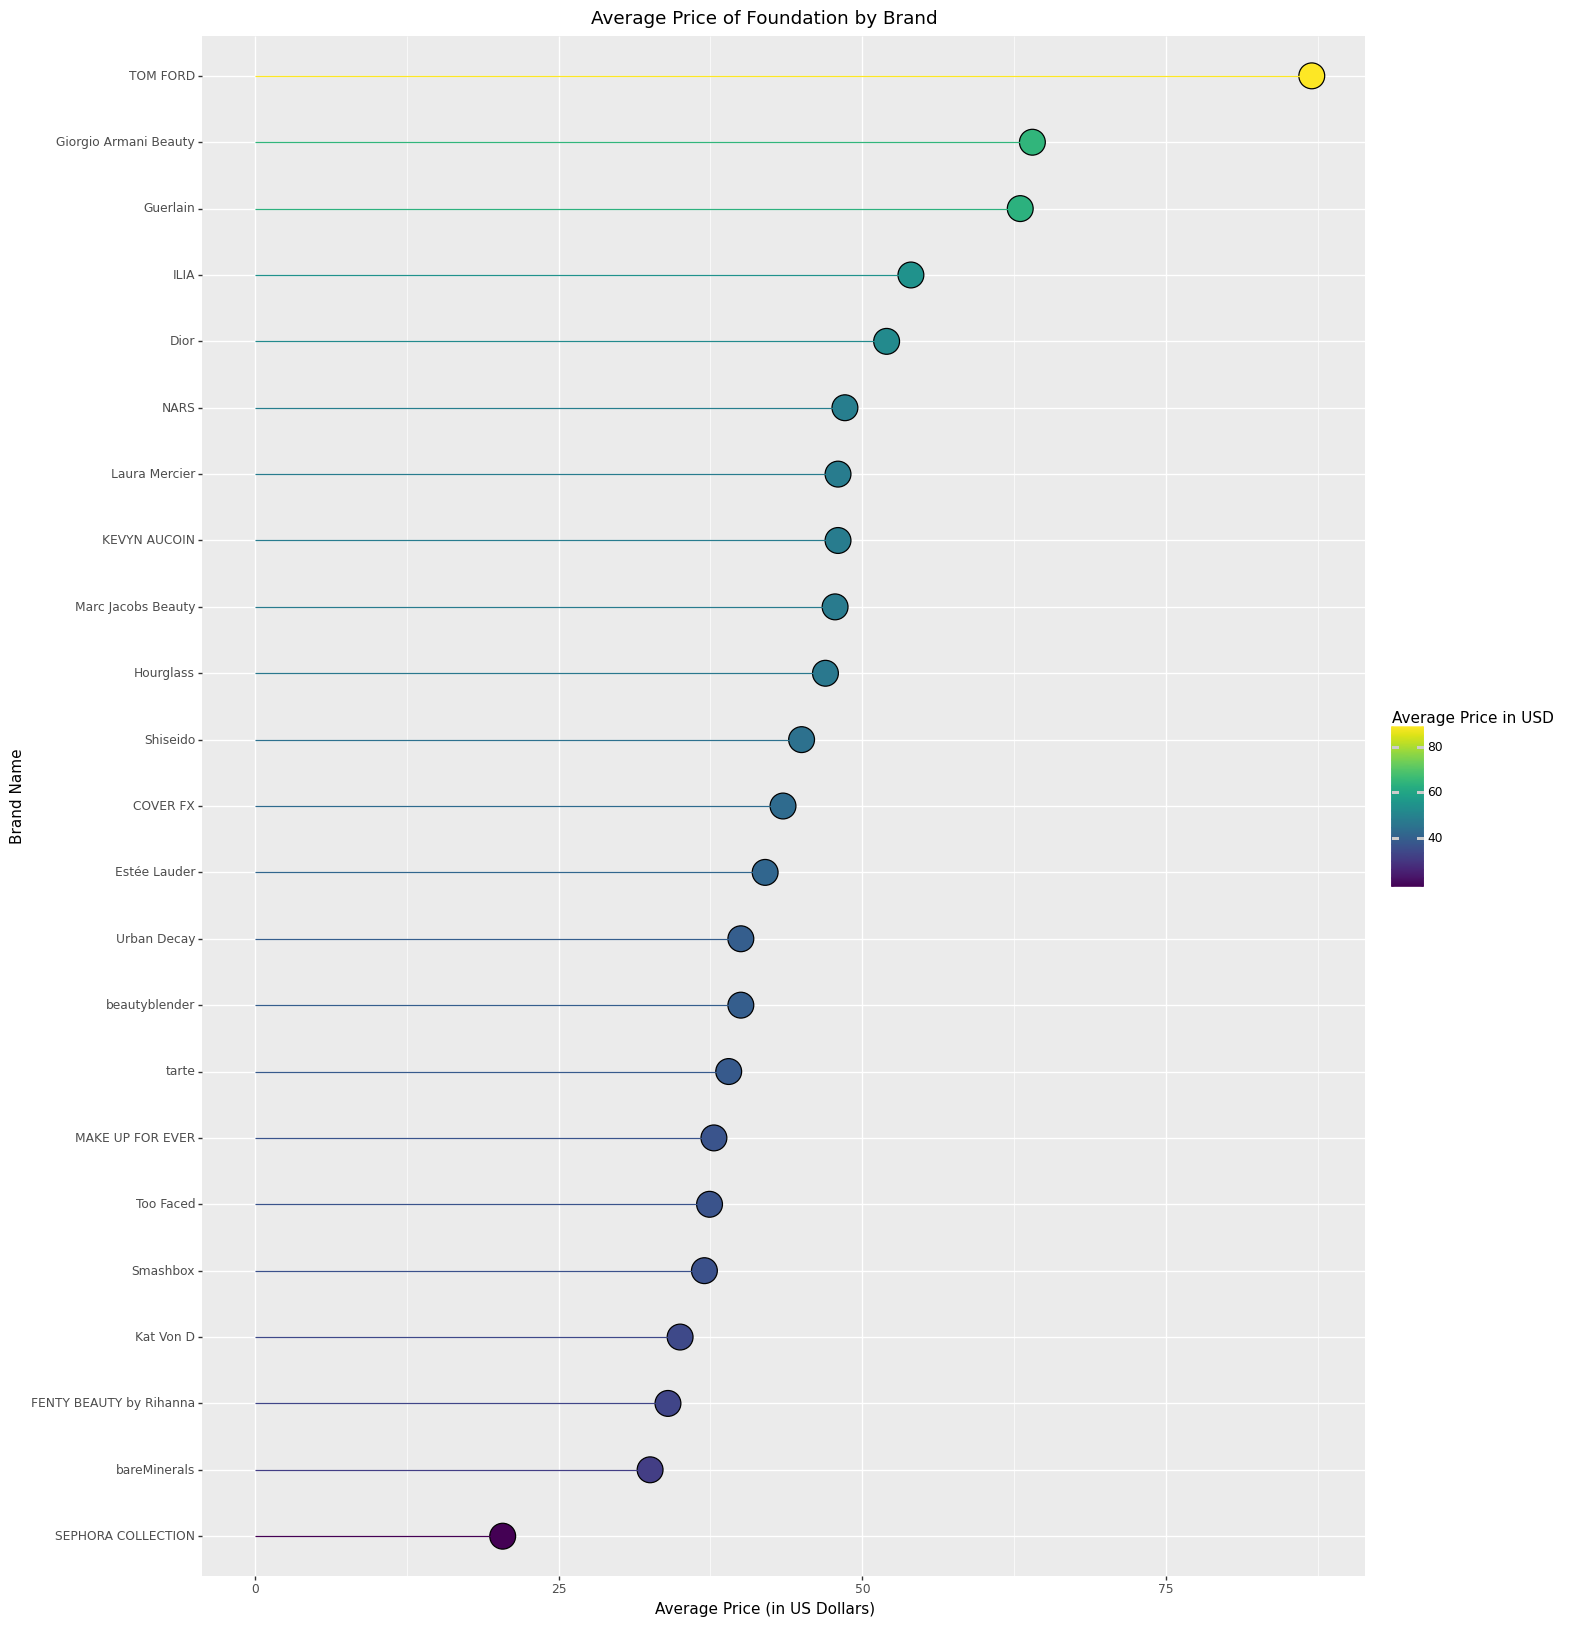

<ggplot: (150503981126)>

In [19]:
brands = list(df['brand'].unique())
avg_reviews = [round(df[df['brand'] == i]['rating'].mean(),2) for i in brands]
count = df['brand'].value_counts()
brand_df = pd.DataFrame({'brand':brands, 'AverageReview':avg_reviews, 'Count': count}).reset_index(drop=True)

# take average price for each brand and add it to brand_df
brand_df['average_price'] = [round(df[df['brand'] == i]['price'].mean(),4) for i in brand_df['brand']]

# reorder brand_df to go in descending order based on 'average_price'
brand_order = brand_df.sort_values('average_price').reset_index(drop=True)['brand']
brand_df['brand'] = pd.Categorical(brand_df['brand'], categories=brand_order, ordered=True)

warnings.filterwarnings("ignore")
(p9.ggplot(brand_df, aes(x = 'brand', y = 'average_price', label = 'average_price', fill = 'average_price')) + 
geom_point(stat='identity', size = 10) + 
geom_segment(aes(y=0,
                x = 'brand',
                yend = 'average_price',
                xend = 'brand', 
                color = 'average_price')) +
theme(figure_size = (15,20)) +
coord_flip() +
ggtitle('Average Price of Foundation by Brand') +
ylab('Average Price (in US Dollars)') +
xlab('Brand Name') + 
labs(fill = 'Average Price in USD', color = 'Average Price in USD'))

In this next part, we will utilize the information that reviewers have provided about themselves and their experiences with the product.

The majority of reviews are written by people who have a "combination" skin type, meaning both dry and oily. This is because skin type can fluctuate over time, and some parts of the face can be oily while others are dry. This may also be because when people are asked to identify what type of skin they have, it can be difficult to categorize it as one or the other. Therefore, they say their skin type is a combination in order to encompass all the fluctuations that may occur.

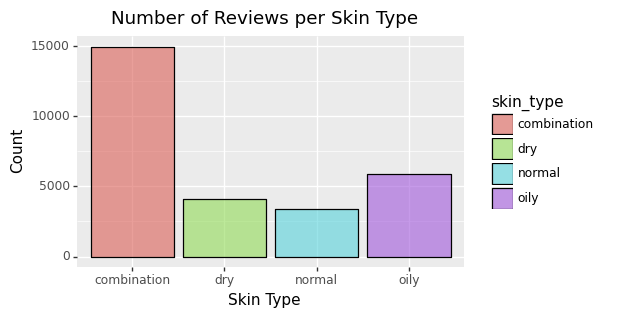

<ggplot: (150504176288)>

In [20]:
skin_type_db = df[~df['skin_type'].isna()]

warnings.filterwarnings("ignore")
(p9.ggplot(skin_type_db, aes(x='skin_type',fill="skin_type")) +
geom_bar(color="black", alpha = 0.6) +
theme(figure_size = (5,3)) +
ggtitle('Number of Reviews per Skin Type') + 
xlab('Skin Type') + 
ylab('Count') )

Additionally, the vast majority of reviewers fall into skin complexions between fair, light, and medium. There does not seem to be much representation of those who are deep, dark, or ebony. Part of this could be possibly attributed to the lack of shade diversity among many foundations.

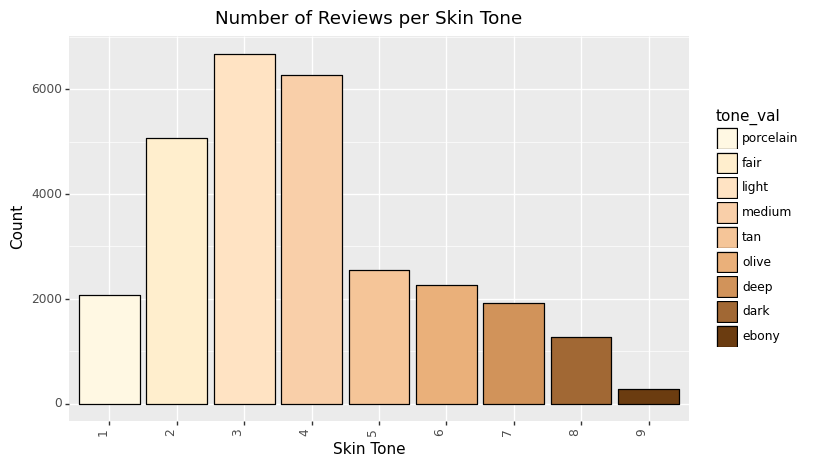

<ggplot: (150503961263)>

In [21]:
# create new df for skin with important info about customer
skin=df[~df["skin_tone"].isna()]
skin=skin[["brand","name","rating","skin_type","skin_concerns","skin_tone","price"]]

# assign numerical value to skin complexion for ranking
tone_val={"porcelain":1,"fair":2,"light":3,"medium":4,"tan":5,"olive":6,"deep":7,"dark":8,"ebony":9}
skin['tone_val'] = pd.Series(skin["skin_tone"], index=skin.index)
skin=skin.replace({"tone_val": tone_val})

# distribution of all skin tones given
skin_palette= ["#FFF8E3", "#FFEECD", "#FFE3C3","#F9CFA9", "#F5C598", "#EAB07A", "#D1935A", "#A16834", "#6B3C10"]
skin["tone_val"]=skin["tone_val"].astype(str)

warnings.filterwarnings("ignore")
(p9.ggplot(skin, aes(x='tone_val',fill="tone_val")) +
geom_bar(color="black") +
theme(figure_size = (8,5)) +
theme(axis_text_x=element_text(rotation=90, hjust=1)) +
ggtitle('Number of Reviews per Skin Tone') + 
xlab('Skin Tone') + 
ylab('Count')) +scale_fill_manual(labels =list(tone_val.keys()),values=skin_palette)

In [22]:
stopwords = set(STOPWORDS)
stopwords.update(['foundation','skin', 'make', 'product', 'face', 
                  'really', 'work', 'use', 'tried', 'color', 'got', 'say', 'actually',
                 'using', 'used', 'one', 'two', 'three', 'four','five', 'definitely', 'absolutely',
                 'bought', 'found', 'still', 'makeup', 'made', 'look', 'feel', 'will', 'though',
                 'little', 'find', 'seem', 'looked', 'Bare', 'Mineral', 'Escentual', 'bareMineral', 'much', 'lot', 'even'])

Next, we can create a word cloud to visualize common words mentioned in review text of products given 1 star. It can be seen that words like "wrong", "dry", "hard", and "oily" pop out.

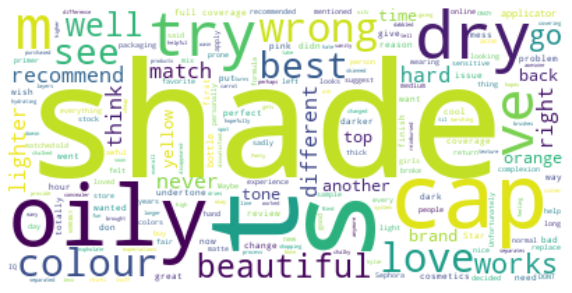

In [23]:
df_1 = df[df['rating'] == 1]
wordcloud1 = WordCloud(stopwords = stopwords, background_color="white").generate(' '.join(df_1['review_text']))
plt.imshow(wordcloud1, interpolation='bilinear')
plt.axis("off")
plt.gcf().set_size_inches(10,10)
plt.show()

When looking at the word cloud generated from review text from foundations with a rating of 5, it can be seen that words like "great", "amazing","best", and "good" stand out. 

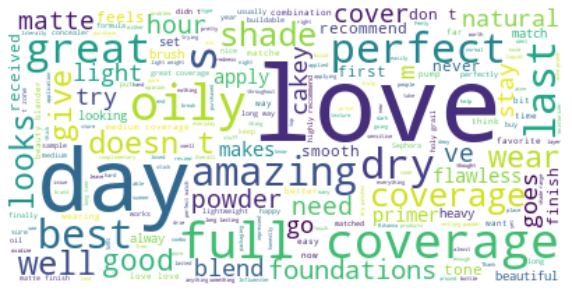

In [24]:
df_5 = df[df['rating'] == 5]
wordcloud5 = WordCloud(stopwords = stopwords, background_color="white").generate(' '.join(df_5['review_text']))
plt.imshow(wordcloud5, interpolation='bilinear')
plt.axis("off")
plt.gcf().set_size_inches(10,10)
plt.show()

Lastly, when analyzing the distribution of price by foundation rating, it can be seen that the distributions and average prices are comparable. However, it seems as though foundations with a rating of 5 are more centered around the average price than other rating distributions. 

In order to see if there really is a difference in the price of foundations based on ratings, we ran an ANOVA test. Our null hypothesis was that the average price of foundation of all the groups of ratings are the same. Our alternative hypothesis is that at least one of the ratings groups is different in its average price of foundation.

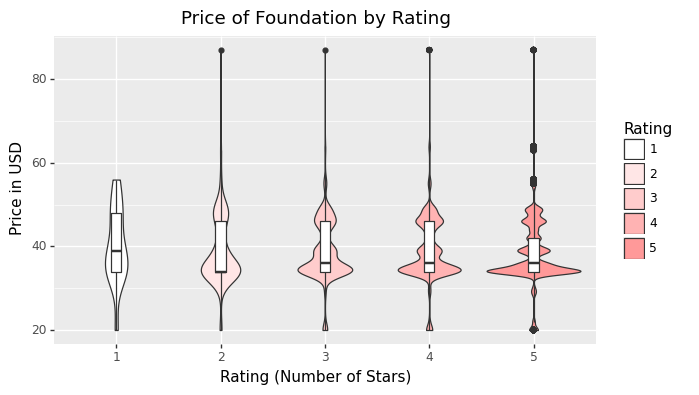

<ggplot: (150503794077)>

In [25]:
# convert ratings back to strings
df['rating'] = df['rating'].astype(str)

warnings.filterwarnings("ignore")
(p9.ggplot(df, aes(x = 'rating', y = 'price')) + 
 geom_violin(aes(fill = 'rating')) +
 geom_boxplot(size = 0.5, width = 0.1) +
 scale_fill_manual(values=["#FFFFFF", "#ffe6e6", "#ffcccc", "#ffb3b3", "#ff9999"]) + 
 ggtitle('Price of Foundation by Rating') + 
 ylab('Price in USD') + 
 xlab('Rating (Number of Stars)') + 
 labs(fill = 'Rating') + 
 theme(figure_size = (7,4)))

In [26]:
#ANOVA TEST
mod = ols('price ~ rating',
                data=df).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
rating,1.407627e+03,4.0,5.975495,0.000084
Residual,1.672405e+06,28398.0,NaN,NaN


Despite our violin plot not showing much information as to how the distribution of the price of foundations changes within different ratings groups, our ANOVA test shows that we do reject the null and thus conclude that there are differences within groups of ratings, meaning that rating of a foundation and the price of a foundation are not independent of one another.

In conclusion, while these visualizations have not been particularly extravagant or exciting, they have been successful in allowing me to take a closer look at nearly every attribute available within my dataset. Additionally, doing some primary cleaning of the data significantly reduced the amount of data that was available to work with. While only 23 brands and 43 products is a small subset, there is no shortage of reviews. Analyzing the aforementioned variables helped me to familiarize myself with the distribution of products within the dataset as well as the common characteristics of the reviewers. 

**Methodology**

RQ1 - What products have existing users already rated, and based on these ratings, what products can be recommended to the existing user?

In order to accurately recommend products to new users, it is important that we have as much information as possible about the available users and products. In taking the 43 unique products of the dataset and 26,504 unique reviewers, the methods that will be utilized in order to return the most useful recommendation to the new user include collaborative filtering matrix factorization, singular value decomposition, and knn. Matrix factorization is a collaborative filtering method that is used in order to find the relationship between users and items. Attributes surrounding both users and products are taken into consideration in order to form a rating prediction for each product by each user. Singular value decomposition is another matrix factorization technique that is used to break down a large matrix that is the number of users by the number of products into 3 generic and familiar matrices. Lastly, k-means is a method of vector quantization that aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean. Bearing these methods in mind, the first action that needs to be taken with our dataset in order to begin the recommendation process would be to create the user-item matrix. Because the dataset has 43 unique items and 26,504 unique users, our matrix will be of these dimensions. However, because every user has not reviewed every item that is present in the dataset , the matrix that is created with the number of rows being the unique users, the number of columns being the unique items, and the data filling the matrix being the rating, is sparse. The dataset contains only 28,403 reviews to fill a matrix consisting of 1.14M entries; therefore, the created sparse matrix is only about 2.5% filled. That being said, it is necessary to create and implicitly fill the sparse matrix with both obtained and missing values. From there, singular value decomposition can be computed. Firstly, the predicted ratings can be calculated. 
The following problem for a matrix X is solved: min||X −M||2 o +λ||M||∗. || · ||o is the Frobenius norm, restricted to the entries corresponding to the non-missing entries of X, and ||M||∗ is the nuclear norm of M (sum of singular values). Next, singular value decomposition is done on the now filled matrix. As mentioned earlier, singular value decomposition is used as a matrix dimension reduction technique. When passing A, a matrix of mxn entries to singular value decomposition, the function decomposes A into three different, yet more familiar matrices, U, D, and V. A is the equivalent of multiplying together U, D, and V transpose. U is a matrix of mxm entries, so in this case the created matrix will represent the users. D is a diagonal matrix with non-negative real values, and lastly, V is a matrix of nxn entries. In our case, V will represent the products. Finally, the matrix V, that represents the products in our dataset, can be passed into knn. The matrix V will contain all products and their predicted ratings by users. That being said, passing it to knn will group the products into clusters with similar ratings. From there, the cluster with the highest average rating can be returned as the best vector of recommendations. 

RQ2 - What products should be returned for new users based on an inputted product of interest?

In order to return a recommended product to a new user, the cosine similarity of each item needs to be computed. The method chosen was collabortive filtering; hence, the item-based similarity needs to be calcualted for the prodcuts. That being said, cosine similarity is used as a measure to determine how similar each product is to one another. From there, a cosine-similarity matrix can be generated, much like a correlation matrix would be. Once again, singular value decomposition of the matrix is performed in order to reduce dimensionality. After the cosine-similarity of each product is determined, the user inputs a product of interest, and the top three most similar products to the product of interest are returned. 

**Data Visualizations and Analysis**

First, I wanted to reiterate the number of unique products and reviews in my dataset just to keep in mind throughout the analysis. As can be seen below, the data after cleaning contains 43 unique products and 26,504 unique reviews. 

In [27]:
uniq_product = df['name'].nunique()
print("Number of uniq product :",uniq_product)

Number of uniq product : 43


In [28]:
uniq_reviewer = df['user_name'].nunique()
print("Number of uniq reviewer :",uniq_reviewer)

Number of uniq reviewer : 26504


Next, the first step of collaborative filtering is to create a pivoted matrix where the rows consist of usernames of reviewers, and the columns are separated by product. This matrix is the sparse matrix that is necessary before implicitly filling and completing sinuglar value decomposition. 

In [29]:
matrix_pivot = pd.pivot_table(df, values='rating', index='user_name', columns='name').fillna(0)
matrix_pivot.head()

name,10 HR Wear Perfection Foundation,All Day Luminous Weightless Foundation,Amazonian Clay 12-Hour Full Coverage Foundation SPF 15,BAREPRO Performance Wear Powder Foundation,BarePRO™ Performance Wear Liquid Foundation Broad Spectrum SPF 20,Born This Way Foundation,Bounce™ Liquid Whip Long Wear Foundation,Camera Ready BB Cream SPF 35,Diorskin Forever Undercover Foundation,Double Wear Stay-in-Place Foundation,...,Synchro Skin Lasting Liquid Foundation Broad Spectrum SPF 20,The Sensual Skin Enhancer Concealer,Traceless Foundation Broad Spectrum SPF 15,Traceless Foundation Stick,Traceless Perfecting Foundation Broad Spectrum SPF 15,True Skin Serum Foundation,Ultra HD Invisible Cover Stick Foundation,Vanish™ Seamless Finish Foundation Stick,Water Foundation Broad Spectrum SPF 15 - Rainforest of the Sea™ Collection,Waterproof Foundation & Concealer
user_name,,,,,,,,,,,,,,,,,,,,,
000K,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
065202251,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
08Aphrodite,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0LeahF,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0Mal0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Next, it is important to normalize the ratings given to products by reviewers considering all people leave ratings based on different internal scales and criteria. That being said, in order to further increase the efficiency of the model, we can subtract the mean rating given overall from the rating value given by the user in each cross between user and products. 

In [30]:
matrix_pivot_ = matrix_pivot.values
user_ratings_mean = np.mean(matrix_pivot_, axis = 1)
user_rating = matrix_pivot_ - user_ratings_mean.reshape(-1,1)

Finally, the U and V matrices can be created. However, since singular value decompisition requires V to be transposed, V transpose (Vt) will be generated instead. 

In [31]:
U, sigma, Vt = svds(user_rating, k = 10)

In [32]:
sigma = np.diag(sigma)

Additionally, after we get the normalized and standardized decomposition matrix that was generated above, slots for the intersection between users and products that are marked 0, meaning the user has not rated that product, can be predicted using singular value decompositon. 

In [33]:
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) + user_ratings_mean.reshape(-1, 1)

The below matrix is the result of predictively rating each product by each user on a normalized scale. 

In [34]:
preds_df = pd.DataFrame(all_user_predicted_ratings, columns = matrix_pivot.columns, index=matrix_pivot.index)
preds_df

name,10 HR Wear Perfection Foundation,All Day Luminous Weightless Foundation,Amazonian Clay 12-Hour Full Coverage Foundation SPF 15,BAREPRO Performance Wear Powder Foundation,BarePRO™ Performance Wear Liquid Foundation Broad Spectrum SPF 20,Born This Way Foundation,Bounce™ Liquid Whip Long Wear Foundation,Camera Ready BB Cream SPF 35,Diorskin Forever Undercover Foundation,Double Wear Stay-in-Place Foundation,...,Synchro Skin Lasting Liquid Foundation Broad Spectrum SPF 20,The Sensual Skin Enhancer Concealer,Traceless Foundation Broad Spectrum SPF 15,Traceless Foundation Stick,Traceless Perfecting Foundation Broad Spectrum SPF 15,True Skin Serum Foundation,Ultra HD Invisible Cover Stick Foundation,Vanish™ Seamless Finish Foundation Stick,Water Foundation Broad Spectrum SPF 15 - Rainforest of the Sea™ Collection,Waterproof Foundation & Concealer
user_name,,,,,,,,,,,,,,,,,,,,,
000K,-0.022930,0.014667,-0.004020,0.028524,4.990411,-0.143892,-0.016123,-0.186951,0.034386,-0.030438,...,0.030644,0.025076,0.033626,0.028773,0.033934,0.017306,0.032060,-0.038540,-0.015619,0.031940
065202251,-0.008682,0.014701,0.000914,0.022672,-0.008917,-0.179202,4.984308,-0.144483,0.030244,-0.031945,...,0.027452,0.024359,0.029768,0.026736,0.029963,0.019134,0.028773,-0.037308,-0.009823,0.028725
08Aphrodite,-0.001082,0.005450,0.001173,0.001062,-0.000627,-0.001287,-0.000960,-0.020210,0.001741,-0.001635,...,0.000961,0.000532,0.001978,0.001442,0.001661,0.000091,0.001632,-0.002448,-0.002153,0.001981
0LeahF,0.222568,0.197110,0.210976,0.193515,-0.096326,0.621917,-0.144483,0.503615,0.187585,-0.377393,...,0.189696,0.191104,0.187626,0.190295,0.187835,0.197591,0.188054,-0.404157,0.218330,0.188651
0Mal0,-0.009063,0.006154,-0.002231,0.013733,3.995757,-0.067373,-0.007134,-0.077061,0.015234,-0.013759,...,0.013349,0.011311,0.014912,0.012863,0.015043,0.008015,0.014255,-0.016922,-0.007147,0.014203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zvo1,-0.010581,0.009469,-0.002509,0.013896,-0.005901,-0.128009,-0.010671,-0.102403,0.019756,-0.020839,...,0.017591,0.015228,0.020095,0.018008,0.019538,0.012893,0.018607,-0.025689,-0.010421,0.018578
zzsing3729,-0.001082,0.005450,0.001173,0.001062,-0.000627,-0.001287,-0.000960,-0.020210,0.001741,-0.001635,...,0.000961,0.000532,0.001978,0.001442,0.001661,0.000091,0.001632,-0.002448,-0.002153,0.001981
zzzg31,-0.008474,0.016871,0.002566,0.024571,-0.009428,-0.191883,-0.016560,-0.147945,0.030890,-0.033836,...,0.028061,0.026268,0.030403,0.027330,0.030606,0.025786,0.029392,-0.039291,0.001498,0.029347


In this final step, it is necessary to create the recommendation function that will return recommendations to users that have similar reviews to those the user has already left. It will return the product with the 3 highest predicted ratings that the user hasn’t already rated. It was also remind the user of what they have already rated. 

In [35]:
def recommend_product(predictions_df, user, data_,num_recommendations):
   
    user_row_number = user
    sorted_user_predictions = preds_df.loc[user_row_number].sort_values(ascending=False)

    user_data = data_[data_.user_name == (user)]
    user_full = user_data


    print('User {0} has already rated {1} product'.format(user, user_full.shape[0]))

    a = df.drop_duplicates(subset='name', keep='last')
    recommendations = (a[~a['name'].isin(user_full['name'])].
         merge(pd.DataFrame(sorted_user_predictions).reset_index(), how = 'left',
               left_on = 'name',
               right_on = 'name').
         rename(columns = {user_row_number: 'Predictions'}).
         sort_values('Predictions', ascending = False).
                       iloc[:num_recommendations, :-1]
                      )
    
    return user_full, recommendations

In [36]:
user = str(input("Enter your username: "))
already_rated, predictions = recommend_product(preds_df, user, df ,3)

Enter your username: zzzooeee
User zzzooeee has already rated 1 product


In [37]:
rated = already_rated[['brand','name','product_id','coverage','finish','formulation','SPF','price']]
rated

,brand,name,product_id,coverage,finish,formulation,SPF,price
13338,tarte,Amazonian Clay 12-Hour Full Coverage Foundatio...,P302918,Full,Matte,Liquid,True,39


In [38]:
prod_pred = predictions[['brand','name','product_id','coverage','finish','formulation','SPF','price']]
prod_pred

,brand,name,product_id,coverage,finish,formulation,SPF,price
3,Too Faced,Born This Way Foundation,P397517,Full,Radiant,Liquid,False,39
30,Smashbox,Camera Ready BB Cream SPF 35,P300339,Light,Natural,Cream,True,42
28,COVER FX,Power Play Foundation,P429425,Full,Matte,Liquid,False,44


Now, we will move on to answering the second research question and therefore returning recommendations to new users based on an inputted product of interest. 

Firstly, we will create a rating matrix that solely consists of usernames of reviewers, the product names, and the associated ratings.

In [39]:
ratings = df[['user_name', 'name', 'rating']]

len(ratings)

28403

Now, collabortive filtering can be done in order to create the recommender system. 

The data is preliminarily split into training and testing sets with the training set consisting of 75% of the data, and the testing set consisting of 25% of the data.

In [40]:
# data preparations
# set rating_scale parameter
reader = Reader(rating_scale=(1, 5))

# the columns must correspond to user, product, and ratings 
data = Dataset.load_from_df(ratings[['user_name', 'name', 'rating']], reader)

#train test split
trainset, testset = train_test_split(data, test_size = 0.25)

Moreover, model evaluation can be done. 

This is to determine which model is best out of SVD, SVD++ and KNN. The metric for determining accuracy is RMSE. 

Firstly, a grid search is done to find the best parameters for the SVD model. Additionally, the best RMSE score possible is found and returned with the combination of parameters that produced the best RMSE score. 

In [41]:
# grid search for the best parameters
param_grid = {'n_factors':[40, 60], 
              'n_epochs': [20, 40, 60],
              'lr_all': [0.002, 0.005],
              'reg_all': [0.1, 0.4, 0.6]}
gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3)

gs.fit(data)
# best RMSE score
print(gs.best_score['rmse'])
# combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

0.6173474258401842
{'n_factors': 40, 'n_epochs': 40, 'lr_all': 0.005, 'reg_all': 0.1}


Returned below is the RMSE of the SVD model.

In [42]:
# run the SVD model
algo = gs.best_estimator['rmse']
algo.fit(trainset)
test_pred = algo.test(testset)
accuracy.rmse(test_pred)

RMSE: 0.6145


0.614456540445154

Next, a grid search is done to find the best parameters for the SVD++ model. Additionally, the best RMSE score possible is found and returned with the combination of parameters that produced the best RMSE score. 

In [43]:
# grid search for the best parameters
param_grid = {'n_factors':[40, 60], 'n_epochs': [20, 40], 'lr_all': [0.005, 0.007],
              'reg_all': [0.2, 0.4, 0.6]}
gs1 = GridSearchCV(SVDpp, param_grid, measures=['rmse', 'mae'], cv=3)

gs1.fit(data)

# best RMSE score
print(gs1.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print(gs1.best_params['rmse'])

0.6166332474137081
{'n_factors': 60, 'n_epochs': 40, 'lr_all': 0.007, 'reg_all': 0.2}


Returned below is the RMSE of the SVD++ model.

In [44]:
algo = gs1.best_estimator['rmse']
algo.fit(trainset)
test_pred = algo.test(testset)
accuracy.rmse(test_pred)

RMSE: 0.6145


0.6145468982901189

Finally, the last model to fit is the KNN model. Returned below is the RMSE of the KNN model. 

In [45]:
algo = KNNBasic(k=40, sim_options={'name': 'pearson_baseline', 'user_based': False})
algo.fit(trainset)

# run the trained model against the test-set
test_pred = algo.test(testset)

# get RMSE
accuracy.rmse(test_pred, verbose=True)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.6267


0.6266652609943028

In [46]:
up_matrix = preds_df.values

Now, matrix factorization (singular value decomposition) of the original user-item matrix is performed, and matrices U, D, and Vt are created. 

In [47]:
# performs matrix factorization of the original user item matrix
up_matrix = preds_df.values
U, sigma, Vt = svds(up_matrix , k = 10)

In [48]:
sigma = np.diag(sigma)
sigma.shape

(10, 10)

In [49]:
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) 
all_user_predicted_ratings.shape

(26504, 43)

As can be seen above, we have the predicted ratings from all users (26,504) for all products (43). 

Finally, the matrix is reconstructed back to a pandas dataframe, which also transposes the matrix to now be products by ratings. 

In [50]:
# converting the reconstructed matrix back to a pandas dataframe
item_based = pd.DataFrame(all_user_predicted_ratings, columns = preds_df.columns, index=list(preds_df.index)).transpose()
item_based.shape

(43, 26504)

Finally, the cosine-similarity matrix that details each products similairity to another is generated. This is computed as item-based similarity (not user-based) considering that for this research question, we are returning recommendations based on an inputted product of an interest and not on an existing users characteristics.

In [51]:
sim_matrix = cosine_similarity(item_based)
collaborative_sim = pd.DataFrame(sim_matrix, columns=item_based.index, index=item_based.index)
collaborative_sim

name,10 HR Wear Perfection Foundation,All Day Luminous Weightless Foundation,Amazonian Clay 12-Hour Full Coverage Foundation SPF 15,BAREPRO Performance Wear Powder Foundation,BarePRO™ Performance Wear Liquid Foundation Broad Spectrum SPF 20,Born This Way Foundation,Bounce™ Liquid Whip Long Wear Foundation,Camera Ready BB Cream SPF 35,Diorskin Forever Undercover Foundation,Double Wear Stay-in-Place Foundation,...,Synchro Skin Lasting Liquid Foundation Broad Spectrum SPF 20,The Sensual Skin Enhancer Concealer,Traceless Foundation Broad Spectrum SPF 15,Traceless Foundation Stick,Traceless Perfecting Foundation Broad Spectrum SPF 15,True Skin Serum Foundation,Ultra HD Invisible Cover Stick Foundation,Vanish™ Seamless Finish Foundation Stick,Water Foundation Broad Spectrum SPF 15 - Rainforest of the Sea™ Collection,Waterproof Foundation & Concealer
name,,,,,,,,,,,,,,,,,,,,,
10 HR Wear Perfection Foundation,1.000000,-0.700589,0.767347,-0.894909,-0.301511,0.764281,-0.359116,0.851215,-0.907676,-0.385459,...,-0.909618,-0.914597,-0.903710,-0.900537,-0.907874,-0.881009,-0.898327,-0.230970,0.916044,-0.902512
All Day Luminous Weightless Foundation,-0.700589,1.000000,-0.143143,0.897278,0.187643,-0.651889,0.155182,-0.782873,0.893499,0.388299,...,0.896570,0.900839,0.896804,0.900987,0.893424,0.875986,0.895685,0.320472,-0.683739,0.900767
Amazonian Clay 12-Hour Full Coverage Foundation SPF 15,0.767347,-0.143143,1.000000,-0.452990,-0.267549,0.566827,-0.416250,0.539569,-0.476086,0.037856,...,-0.476350,-0.475705,-0.473045,-0.456337,-0.476393,-0.468196,-0.467865,-0.141739,0.731312,-0.458435
BAREPRO Performance Wear Powder Foundation,-0.894909,0.897278,-0.452990,1.000000,0.372490,-0.628849,0.288863,-0.796219,0.994590,0.434984,...,0.993192,0.989038,0.994207,0.993140,0.994564,0.978209,0.992679,0.340842,-0.879390,0.994699
BarePRO™ Performance Wear Liquid Foundation Broad Spectrum SPF 20,-0.301511,0.187643,-0.267549,0.372490,1.000000,-0.079224,-0.003014,-0.133641,0.298026,-0.005284,...,0.291169,0.270674,0.292516,0.285791,0.297781,0.268380,0.286844,-0.005422,-0.313310,0.291697
Born This Way Foundation,0.764281,-0.651889,0.566827,-0.628849,-0.079224,1.000000,-0.152214,0.958039,-0.653277,-0.256519,...,-0.667914,-0.703240,-0.653569,-0.650743,-0.653743,-0.586441,-0.657866,-0.293214,0.648638,-0.652035
Bounce™ Liquid Whip Long Wear Foundation,-0.359116,0.155182,-0.416250,0.288863,-0.003014,-0.152214,1.000000,-0.183871,0.321452,-0.009576,...,0.315766,0.294539,0.315700,0.310386,0.321387,0.287835,0.309838,-0.010894,-0.482702,0.315590
Camera Ready BB Cream SPF 35,0.851215,-0.782873,0.539569,-0.796219,-0.133641,0.958039,-0.183871,1.000000,-0.814145,-0.392178,...,-0.824369,-0.856024,-0.816636,-0.813194,-0.814564,-0.751825,-0.825136,-0.431523,0.774460,-0.814855
Diorskin Forever Undercover Foundation,-0.907676,0.893499,-0.476086,0.994590,0.298026,-0.653277,0.321452,-0.814145,1.000000,0.438840,...,0.999565,0.995650,0.999531,0.999266,1.000000,0.982144,0.997457,0.337719,-0.896413,0.999468


For further analysis, the row and column headers of the cosine-similarity matrix are removed and replaced with indeces for later reference. 

In [52]:
collab = collaborative_sim.copy()
indeces = np.arange(43)
collab.columns = indeces
collab.index = indeces

In [53]:
collab

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,1.000000,-0.700589,0.767347,-0.894909,-0.301511,0.764281,-0.359116,0.851215,-0.907676,-0.385459,...,-0.909618,-0.914597,-0.903710,-0.900537,-0.907874,-0.881009,-0.898327,-0.230970,0.916044,-0.902512
1,-0.700589,1.000000,-0.143143,0.897278,0.187643,-0.651889,0.155182,-0.782873,0.893499,0.388299,...,0.896570,0.900839,0.896804,0.900987,0.893424,0.875986,0.895685,0.320472,-0.683739,0.900767
2,0.767347,-0.143143,1.000000,-0.452990,-0.267549,0.566827,-0.416250,0.539569,-0.476086,0.037856,...,-0.476350,-0.475705,-0.473045,-0.456337,-0.476393,-0.468196,-0.467865,-0.141739,0.731312,-0.458435
3,-0.894909,0.897278,-0.452990,1.000000,0.372490,-0.628849,0.288863,-0.796219,0.994590,0.434984,...,0.993192,0.989038,0.994207,0.993140,0.994564,0.978209,0.992679,0.340842,-0.879390,0.994699
4,-0.301511,0.187643,-0.267549,0.372490,1.000000,-0.079224,-0.003014,-0.133641,0.298026,-0.005284,...,0.291169,0.270674,0.292516,0.285791,0.297781,0.268380,0.286844,-0.005422,-0.313310,0.291697
5,0.764281,-0.651889,0.566827,-0.628849,-0.079224,1.000000,-0.152214,0.958039,-0.653277,-0.256519,...,-0.667914,-0.703240,-0.653569,-0.650743,-0.653743,-0.586441,-0.657866,-0.293214,0.648638,-0.652035
6,-0.359116,0.155182,-0.416250,0.288863,-0.003014,-0.152214,1.000000,-0.183871,0.321452,-0.009576,...,0.315766,0.294539,0.315700,0.310386,0.321387,0.287835,0.309838,-0.010894,-0.482702,0.315590
7,0.851215,-0.782873,0.539569,-0.796219,-0.133641,0.958039,-0.183871,1.000000,-0.814145,-0.392178,...,-0.824369,-0.856024,-0.816636,-0.813194,-0.814564,-0.751825,-0.825136,-0.431523,0.774460,-0.814855
8,-0.907676,0.893499,-0.476086,0.994590,0.298026,-0.653277,0.321452,-0.814145,1.000000,0.438840,...,0.999565,0.995650,0.999531,0.999266,1.000000,0.982144,0.997457,0.337719,-0.896413,0.999468
9,-0.385459,0.388299,0.037856,0.434984,-0.005284,-0.256519,-0.009576,-0.392178,0.438840,1.000000,...,0.434416,0.480414,0.431324,0.461594,0.439134,0.392790,0.432546,-0.021234,-0.217933,0.461586


Next, it is necessary to downsize the cosine-similarity matrix to only compute the cosine-similarity between products once. To do so, the duplicates of the matrix are dropped, and only unique products remain. The indeces of the newly calculated matrix are also reset. 

In [54]:
unique_products = df.copy()
unique_products = unique_products.drop_duplicates('name')
unique_products = unique_products.reset_index()
unique_products

,index,brand,name,product_id,coverage,finish,formulation,normal_skin,oily_skin,combo_skin,...,user_name,rating,skin_type,skin_tone,skin_concerns,price,review_text,brand_image_url,product_image_url,brand_cat
0,0,FENTY BEAUTY by Rihanna,Pro Filt'r Soft Matte Longwear Foundation,P87985432,Medium,Matte,Liquid,True,True,True,...,serena2304,4,oily,tan,acne,34,Really good foundation I like it a lot but som...,/contentimages/brands/fentybeauty/logo.jpg,https://www.sephora.com/productimages/sku/s192...,FENTY BEAUTY by Rihanna
1,7311,Giorgio Armani Beauty,Luminous Silk Foundation,P393401,Medium,Natural,Liquid,True,False,True,...,kk1995,5,combination,medium,darkCircles,64,I just received a trail size of this foundatio...,/contentimages/brands/giorgioarmani/1517_logo_...,https://www.sephora.com/productimages/sku/s207...,Giorgio Armani Beauty
2,7476,Estée Lauder,Double Wear Stay-in-Place Foundation,P378284,Full,Matte,Liquid,True,True,True,...,lhenery,5,oily,porcelain,acne,42,As a very fair warm/neutral girl I was never e...,/contentimages/brands/esteelauder/071613_Estee...,https://www.sephora.com/productimages/sku/s211...,Estée Lauder
3,8695,Too Faced,Born This Way Foundation,P397517,Full,Radiant,Liquid,True,True,True,...,ibhade30,5,combination,ebony,acne,39,I have oily skin---yes OILY skin. But with dry...,/contentimages/brands/toofaced/050812_toofaced...,https://www.sephora.com/productimages/sku/s208...,Too Faced
4,10388,bareMinerals,Original Foundation Broad Spectrum SPF 15,P61003,Medium,Radiant,Loose,True,True,True,...,kh458923,5,oily,porcelain,acne,29,I am a big fan. I am on the fairer side but ha...,/contentimages/brands/bareescentuals/082212_ba...,https://www.sephora.com/productimages/sku/s747...,bareMinerals
5,10619,Kat Von D,Lock-It Foundation,P311138,Full,Matte,Liquid,True,True,True,...,subxscum,5,combination,medium,acne,35,Let me start by saying if you have dry skin th...,/contentimages/brands/katvond/KatVonD_Logo_101...,https://www.sephora.com/productimages/sku/s181...,Kat Von D
6,13296,tarte,Amazonian Clay 12-Hour Full Coverage Foundatio...,P302918,Full,Matte,Liquid,True,True,True,...,aashyy,4,oily,light,acne,39,I switched from Kat Von D Lock-It foundation b...,/contentimages/brands/tarte/launch/092712_Tart...,https://www.sephora.com/productimages/sku/s165...,tarte
7,13923,Urban Decay,Naked Skin Weightless Ultra Definition Liquid ...,P374830,Medium,Matte,Liquid,True,False,True,...,abbeymsmith,5,combination,fair,acne,40,"Medium coverage, but can easily be layered for...",/contentimages/brands/urbandecay/3806_logo_279...,https://www.sephora.com/productimages/sku/s143...,Urban Decay
8,14360,Hourglass,Vanish™ Seamless Finish Foundation Stick,P410532,Full,Natural,Stick,True,True,True,...,Ginababe,5,dry,medium,aging,46,"Great foundation. Light, comfortable and great...",/contentimages/brands/hourglass/Hourglass_Logo...,https://www.sephora.com/productimages/sku/s182...,Hourglass
9,15811,SEPHORA COLLECTION,10 HR Wear Perfection Foundation,P379509,Medium,Natural,Liquid,True,True,True,...,deeendnamtoe,5,combination,porcelain,acne,20,"If you have fair skin, the fairest in all the ...",/contentimages/brands/sephoracollection/Nth_le...,https://www.sephora.com/productimages/sku/s149...,SEPHORA COLLECTION


The final step is to define he recommender function used to return the top 3 most similar products to the one inputted by the user. This is done by traversing the matrix and finding the highest cosine-similarity scores between the inputted product and others in the dataset. 

In [55]:
def recommender(product_name):
    product_id = unique_products[unique_products.name == product_name].index[0]
    
    collab_rank = collab.iloc[product_id].rank(ascending=False, method='min')
    
    rank = collab_rank
    
    rank = rank.sort_values()[1:]
    
    result = unique_products.iloc[list(rank.sort_values()[:3].index)]
    
    collab_sim = list(collab.iloc[product_id,list(result.index)])
    result.loc[:,'collab_sim'] = collab_sim
    final = result[['brand','name','product_id','coverage','finish','formulation','SPF','price','collab_sim']]
    return final

In [56]:
product_name = str(input("Enter the product you want to base recommendations from: "))
recommendations = recommender(product_name)
recommendations

Enter the product you want to base recommendations from: Born This Way Foundation


,brand,name,product_id,coverage,finish,formulation,SPF,price,collab_sim
42,TOM FORD,Traceless Foundation Broad Spectrum SPF 15,P422572,Full,Radiant,Liquid,True,87,0.994699
8,Hourglass,Vanish™ Seamless Finish Foundation Stick,P410532,Full,Natural,Stick,False,46,0.994590
24,SEPHORA COLLECTION,MicroSmooth Baked Foundation Face Powder,P310719,Light,Natural,Pressed,False,22,0.994587


**Ethical Recommendations**

When thinking about the ethical implications of a foundation recommendation system, there are many factors to consider. The success of different foundation brands may be at risk if the recommendation system is not adequately constructed. That being said, a recommendation system in charge of suggesting foundations to users needs to function in a way that avoids bias and gives every company with sought after products a fair chance of being included in the list of returned recommendations. 
	Many recommendation systems for makeup are run by cosmetic companies themselves, and therefore, the results may be convoluted by ulterior motives. A lot of times, foundation companies can pay websites like Sephora and Ulta or other popular companies to promote their products more than others. There are always deals occurring that may lead one company's products to be pushed more than another. A way to visualize this is when you search for a product on Google, and the first 3-5 search results are ads rather than top purchases of other users. That being said, it is important that in my recommendation system results are returned solely based on reviews as this is what’s advertised and its concept. 
	On another hand, it's important to think about the inclusivity of recommendations. 
One of the greatest issues plaguing the cosmetic industry right now is the lack of available shades for darker skin tones. A lot of times, foundations will have a large range of shades, formulations, and coverages available for people of lighter skin tones. However, when it comes to darker skin tones, less thought has been put into formulation, and there are less products available. Bearing that in mind, it is important in my recommendation engine that when returning shades for people of darker skin tones, these recommendations are based on users that also have a darker skin tone. Lastly, it is important that no recommendations for a particular foundation are made to people who input that they have a darker skin tone when there is no shade available for them in that particular product. This is important to consider when filtering results. 

**Challenges**

The challenges that I encountered in this project largely occurred when writing the models and functions, as was to be expected. While pivoting the matrix and creating the predicted ratings was not too hard code wise, learning the concepts and theories behind matrix factorization and single value decomposition was a steep learning curve. While I have had exposure to these methods in the past, I did not have experience applying them to a recommendation system. Additionally, I had never written a function in Python that took a user input, so this took some playing around with as well. However, after some time, I was able to figure out the mechanics. Moreover, when moving onto recommendations for new users, it was slightly difficult to find a way to run the three different models and compare them. However, after determining the correct model and then creating the cosine-similarity matrix, the hardest part came when writing the recommendation function. It was difficult to edit the matrix so that it could be parsed through and recommendations could be sorted and returned. Nevertheless, all in all, I was able to overcome these challenges and finish the project. 

**Recommendations**

If I were to provide some recommendations for anyone looking to replicate this project with improvements, I would recommend scraping a larger dataset. As was deatiled earlier, many of the columns were missing data. As a result, after cleaning, while a large number of unique reviewers remained, there was not a large number of unique products. That being said, in order to create a better recommendation system, it would be better to have more data to pass to the models. Additionally, on this same tract, the recommendation system would also be more comprehensive if data was included from other cosmetics stores such as Ulta. High end luxury brands could also be included, as well as drug stores. Lastly, it may be more user-friendly if the functions were adapted into a web application. While this was out of the realm of my capabilities for this project, this would definitely make the outcome more accessible and professional. 

**References**

Capstone/code at master · QiuQiuJing/Capstone. (n.d.). GitHub. Retrieved April 17, 2023, from https://github.com/QiuQiuJing/Capstone/tree/master/code

Duan, R., Jiang, C., & Jain, H. K. (2022). Combining review-based collaborative filtering and matrix factorization: A solution to rating’s sparsity problem. Decision Support Systems, 156, 113748. https://doi.org/10.1016/j.dss.2022.113748

Himaeda. (2020, December 17). Personalized Recommendation on Sephora using Neural Collaborative Filtering. Medium. https://himaeda.medium.com/personalized-recommendation-on-sephora-using-neural-collaborative-filtering-1d4c1fa3f98d

Jing, Q. (2019, August 5). Recommender System: Skin Care Product. Medium. https://medium.com/@joyqiujing/recommender-system-skin-care-product-52d2bd2fcf23

Ramamurthy, S. (2021, April 26). Sephora Foundation Analysis Project. GitHub. https://github.com/sangeeeeee/SephoraFoundationReviewsAnalysis/blob/master/final_project/Foundation_Exploratory_Analysis.ipynb

Sarwar, B., Karypis, G., Konstan, J., & Reidl, J. (2001). Item-based collaborative filtering recommendation algorithms. Proceedings of the Tenth International Conference on World Wide Web - WWW ’01. https://doi.org/10.1145/371920.372071

Skincare Recommendation Engine. (n.d.). Kaggle.com. Retrieved April 17, 2023, from https://www.kaggle.com/code/eward96/skincare-recommendation-engine/notebook

Skincare Recommendation System using CF Method. (n.d.). Kaggle.com. https://www.kaggle.com/code/dyahnurlita/skincare-recommendation-system-using-cf-method/notebook

Sephora. (2018). Cosmetics, Beauty Products, Fragrances & Tools | Sephora. Sephora. https://www.sephora.com/